In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
!pip install prophet
%matplotlib inline

In [70]:
df = pd.read_csv("healthcare_dataset.csv")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [72]:
df.shape

(55500, 15)

In [73]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306          328         Urgent     2024-02-02  Paracetamol   
1    33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2    27955.096079          205      Emergency     2022-10-07      Aspirin   
3    37909.782410          450       Elective     2020-12-18    Ibuprofen   
4    14238.317814          458         Urgent     2022-10-09   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [74]:
df.describe()

Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000

In [75]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [76]:
df.duplicated().sum()

np.int64(534)

In [77]:
df.drop_duplicates(inplace=True)

In [78]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

#Value counts

In [79]:
df['Gender'].value_counts()

Gender
Male      27496
Female    27470
Name: count, dtype: int64

In [80]:
df['Blood Type'].value_counts()

Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64

In [81]:
df['Medical Condition'].value_counts()

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

In [82]:
df.Medication.value_counts()

Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: count, dtype: int64

In [83]:
df['Test Results'].value_counts()

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

In [84]:
df['Insurance Provider'].value_counts()

Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64

In [85]:
df['Room Number'].value_counts()

Room Number
393    176
420    174
104    174
491    173
209    170
      ... 
189    112
257    111
381    110
254    108
398    108
Name: count, Length: 400, dtype: int64

In [86]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [87]:
df['Date_of_Admission'] = pd.to_datetime(df['Date_of_Admission'])
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'])

In [88]:
df['Stay_Duration'] = (df['Discharge_Date'] - df['Date_of_Admission']).dt.days

In [89]:
df['Admission_Year'] = df['Date_of_Admission'].dt.year

In [90]:
df['Admission_Month'] = df['Date_of_Admission'].dt.to_period('M')

In [91]:
df['Negative_Billing'] = df['Billing_Amount'] < 0

In [92]:
df['Gender'] = df['Gender'].str.capitalize()

In [93]:
df['Name'] = df['Name'].str.title()

In [94]:
df['Medical_Condition'] = df['Medical_Condition'].str.capitalize()

# Univariate Analysis


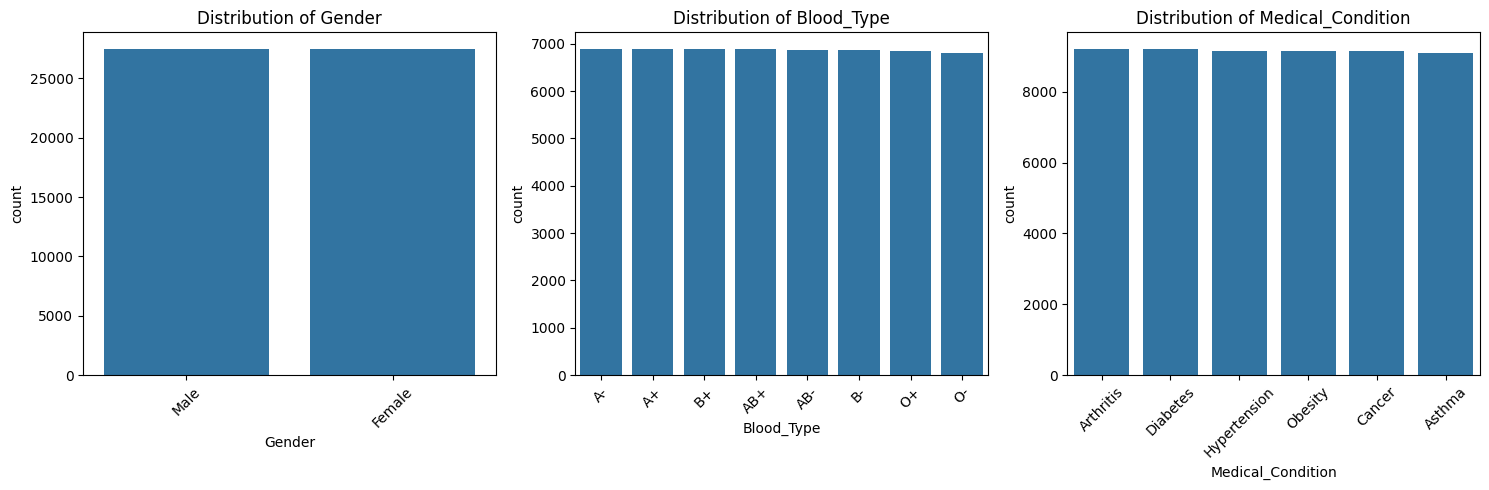

In [95]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Blood_Type', 'Medical_Condition']):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

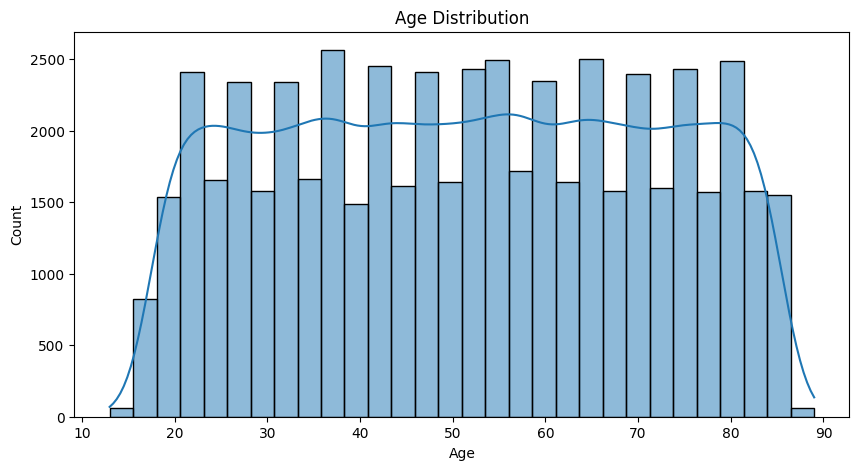

In [96]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

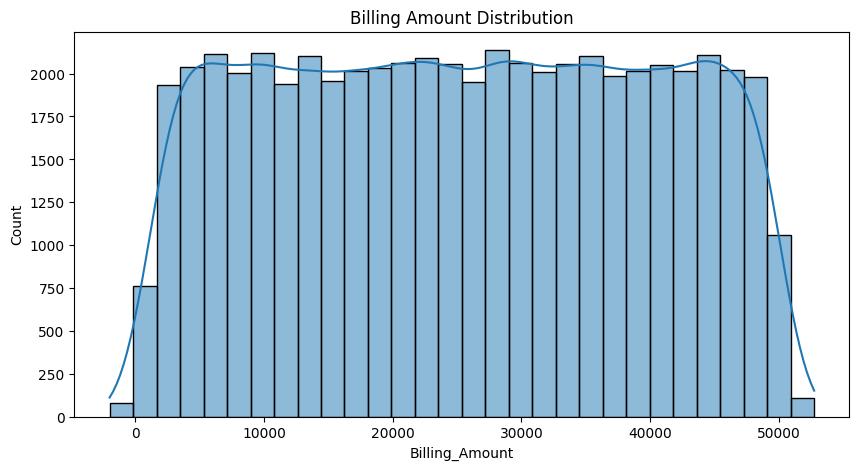

In [97]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Billing_Amount'], bins=30, kde=True)
plt.title('Billing Amount Distribution')
plt.show()

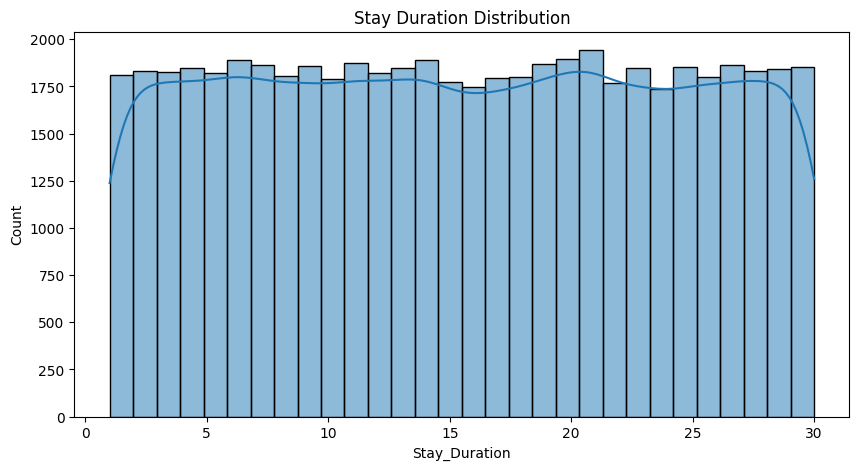

In [98]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Stay_Duration'], bins=30, kde=True)
plt.title('Stay Duration Distribution')
plt.show()

# Categorical Distributions


<ipython-input-103-10afaea21a61>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




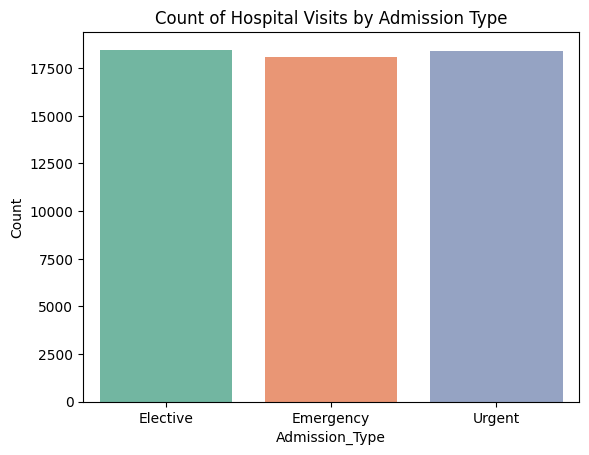

In [103]:
# Count of Hospital Visits by Admission Type
df['Admission_Type'] = df['Admission_Type'].astype('category')
sns.countplot(x='Admission_Type', data=df, palette='Set2')

plt.xlabel('Admission_Type')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Admission Type')
plt.show();

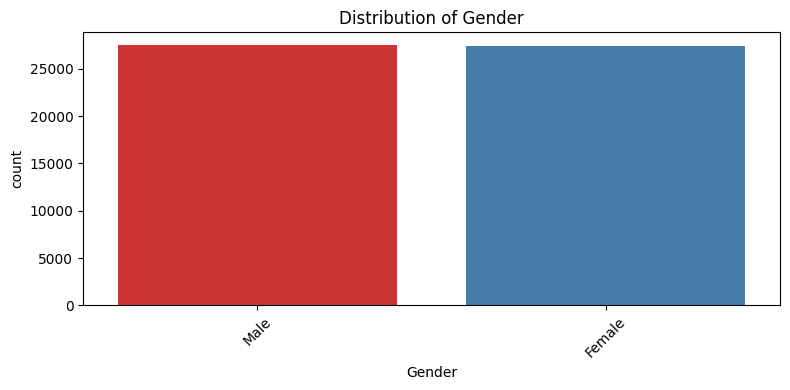

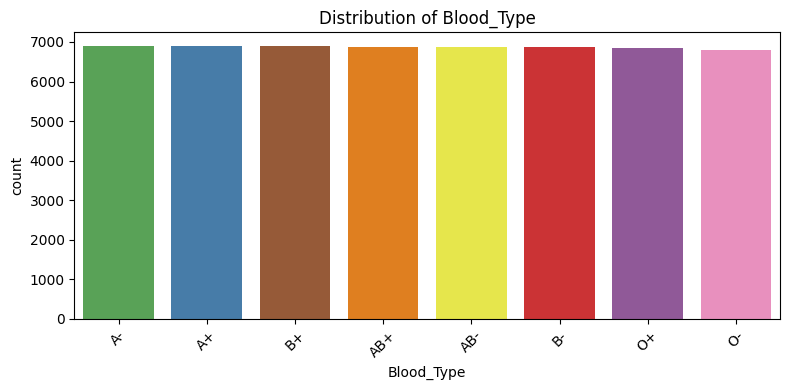

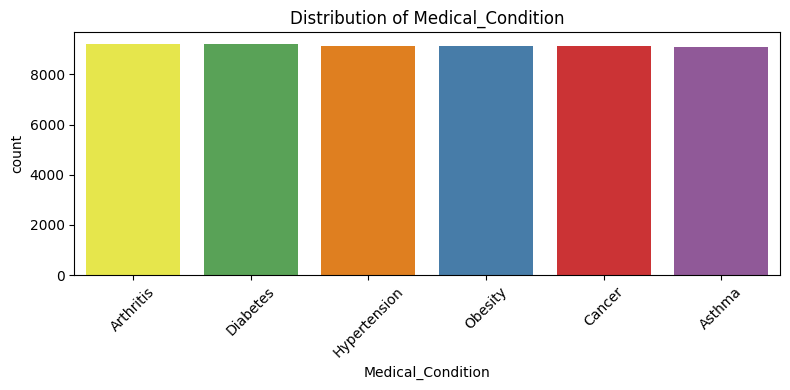

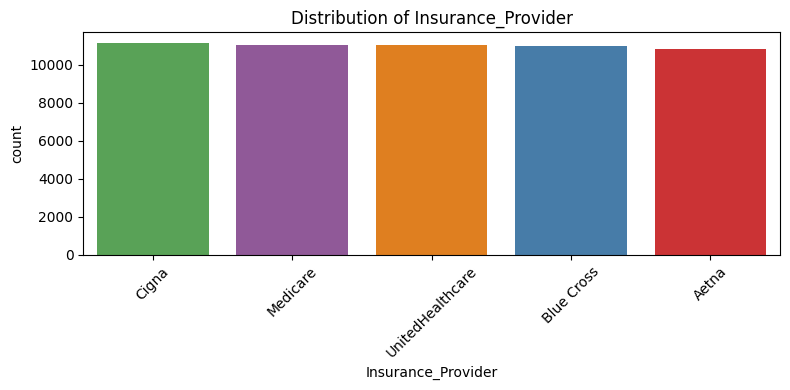

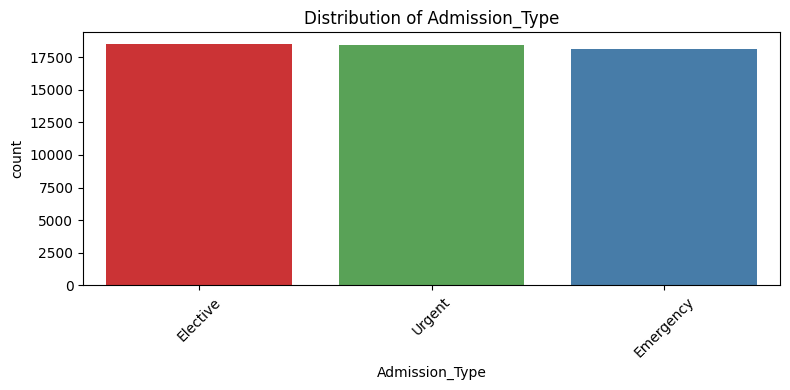

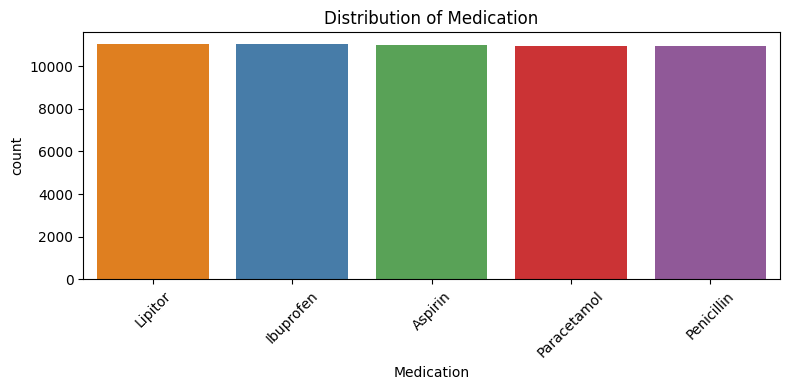

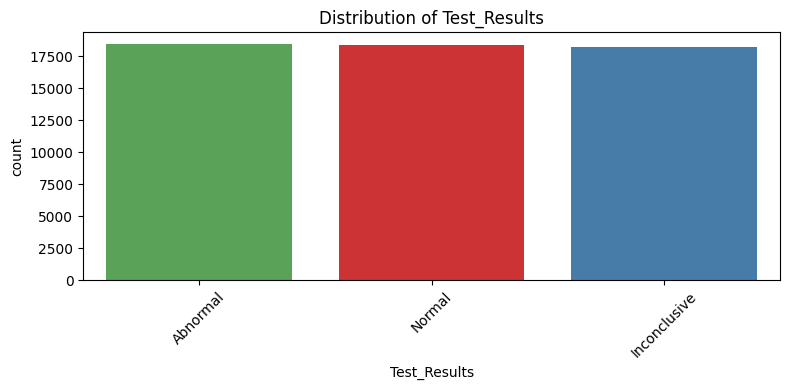

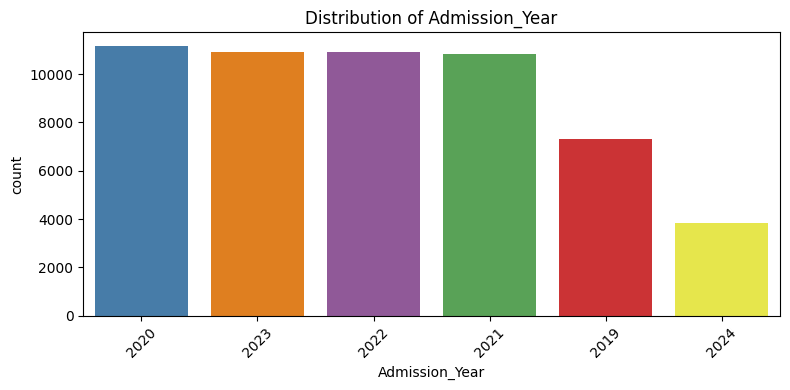

In [166]:
categorical_cols = ['Gender', 'Blood_Type', 'Medical_Condition', 'Insurance_Provider',
                    'Admission_Type', 'Medication', 'Test_Results', 'Admission_Year']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=col, legend=False, palette='Set1')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-105-00ec47cdd89d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




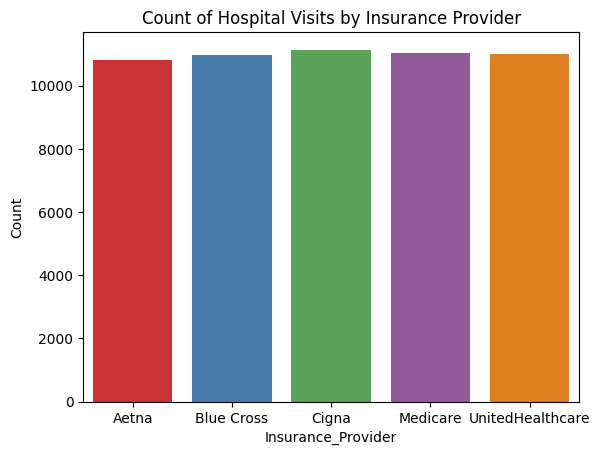

In [105]:
df['Insurance_Provider'] = df['Insurance_Provider'].astype('category')
sns.countplot(x='Insurance_Provider', data=df, palette='Set1')

plt.xlabel('Insurance_Provider')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Insurance Provider')
plt.show();

# Correlation Heatmap


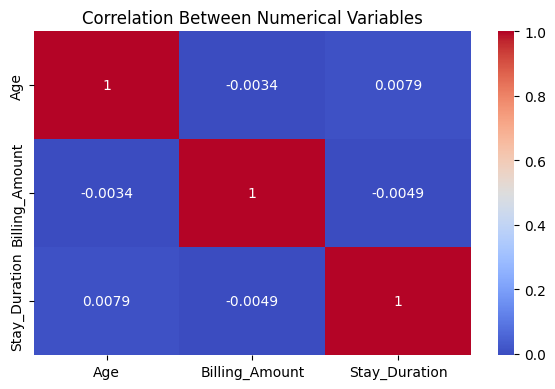

In [52]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'Billing_Amount', 'Stay_Duration']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Variables")
plt.tight_layout()
plt.show()

# Bivariate & Multivariate Analysis


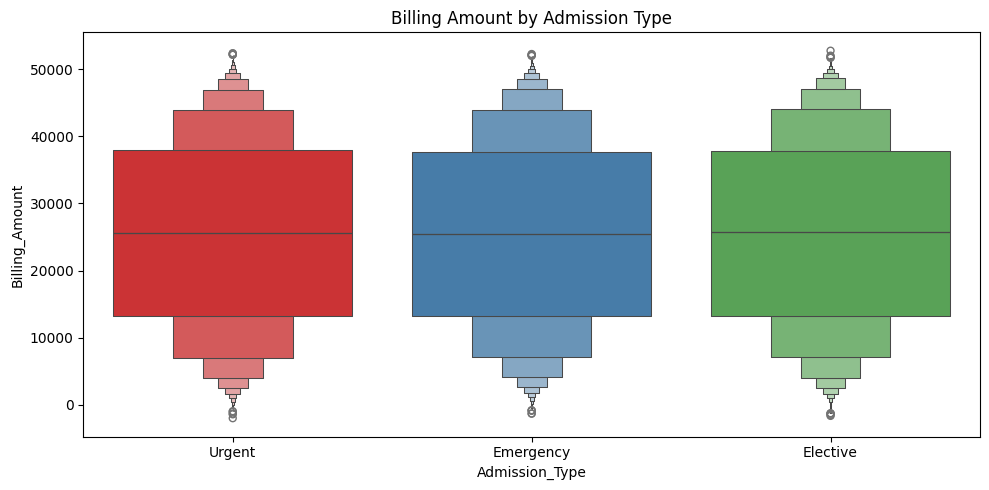

In [57]:
plt.figure(figsize=(10, 5))
sns.boxenplot(data=df, x='Admission_Type', y='Billing_Amount', hue='Admission_Type', palette='Set1', legend=False)
plt.title('Billing Amount by Admission Type')
plt.tight_layout()
plt.show()


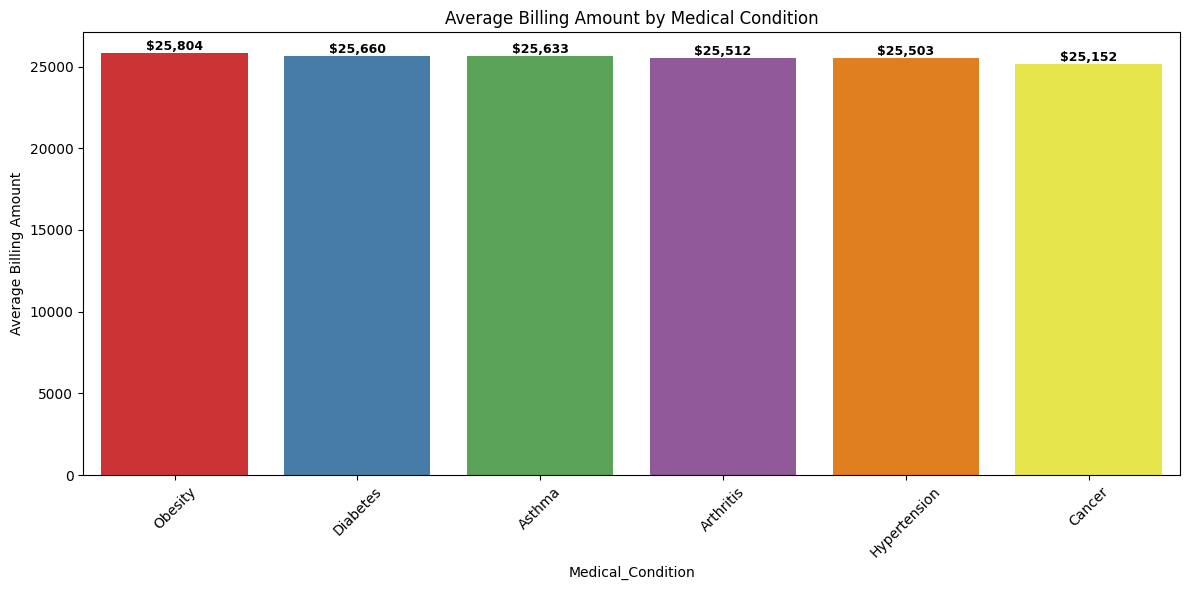

In [115]:
avg_billing = df.groupby('Medical_Condition')['Billing_Amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_billing.index, y=avg_billing.values,
                 hue=avg_billing.index, palette='Set1', legend=False)

plt.xticks(rotation=45)
plt.ylabel("Average Billing Amount")
plt.title("Average Billing Amount by Medical Condition")

# Add value labels
for i, v in enumerate(avg_billing.values):
    ax.text(i, v + 200, f"${v:,.0f}", ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


In [59]:
# Create summary table
summary_table = df.groupby('Medical_Condition')['Billing_Amount'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
summary_table = summary_table.round(2)
print(summary_table)


                       mean    median  count
Medical_Condition                           
Obesity            25804.36  26145.58   9146
Diabetes           25660.48  25647.71   9216
Asthma             25633.46  25628.41   9095
Arthritis          25511.78  25599.18   9218
Hypertension       25503.06  25281.63   9151
Cancer             25152.32  24910.71   9140


In [33]:
condition_counts = df['Medical_Condition'].value_counts()
go.Figure(data=[go.Pie(
    labels=condition_counts.index,
    values=condition_counts.values,
    hole=0.5,
    marker=dict(colors=px.colors.qualitative.Pastel),
    textinfo="label+percent"
)]).update_layout(title="Distribution of Medical Conditions").show()


In [155]:
import plotly.express as px

fig = px.treemap(df, path=['Medical_Condition', 'Test_Results'], values='Billing_Amount',
                 color='Billing_Amount', title="Treemap: Condition & Billing")
fig.show()


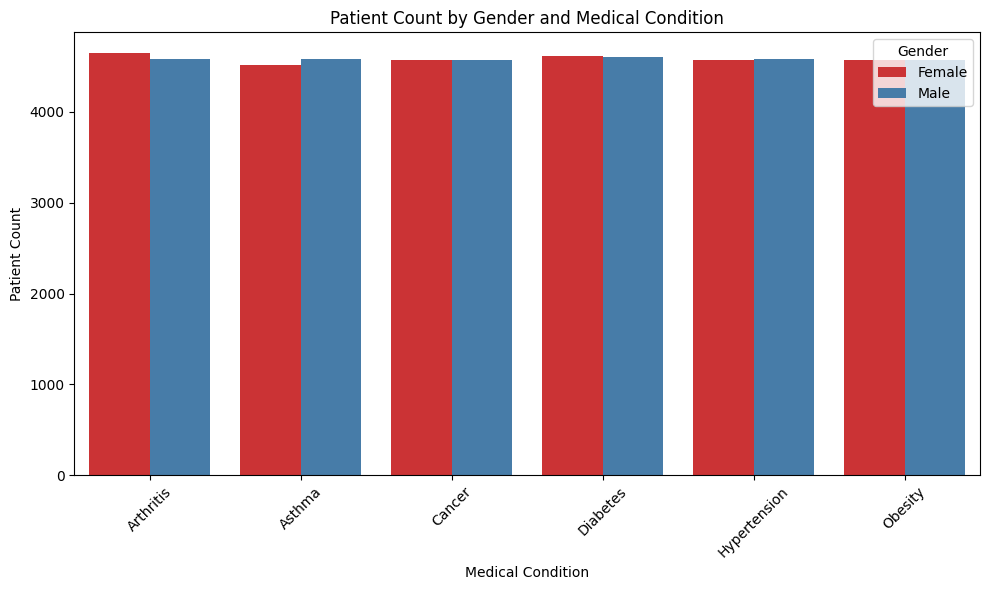

In [117]:
sex_by_condition = df.groupby(['Medical_Condition', 'Gender']).size().reset_index(name='Count')

pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
sns.barplot(data=sex_by_condition, x='Medical_Condition', y='Count', hue='Gender', palette='Set1')

plt.title('Patient Count by Gender and Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Patient Count')

plt.legend(title='Gender')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show();

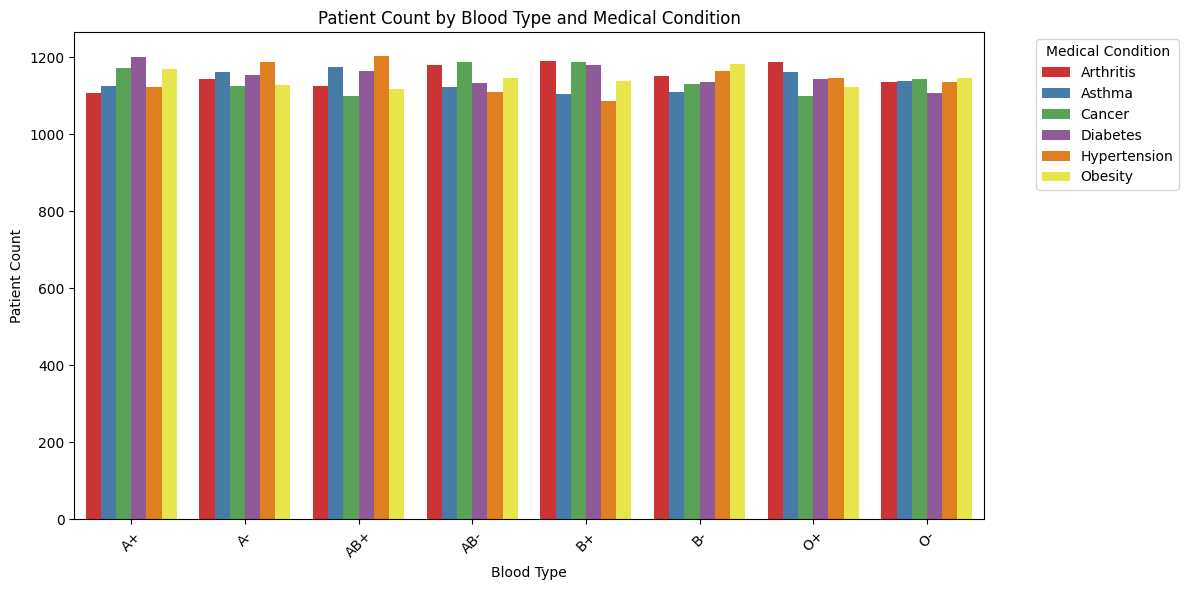

In [121]:
grouped_df = df.groupby(['Blood_Type', 'Medical_Condition']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.barplot(data=grouped_df, x='Blood_Type', y='Count', hue='Medical_Condition', palette='Set1')

plt.title('Patient Count by Blood Type and Medical Condition')
plt.xlabel('Blood Type')
plt.ylabel('Patient Count')

# Move legend to the right
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


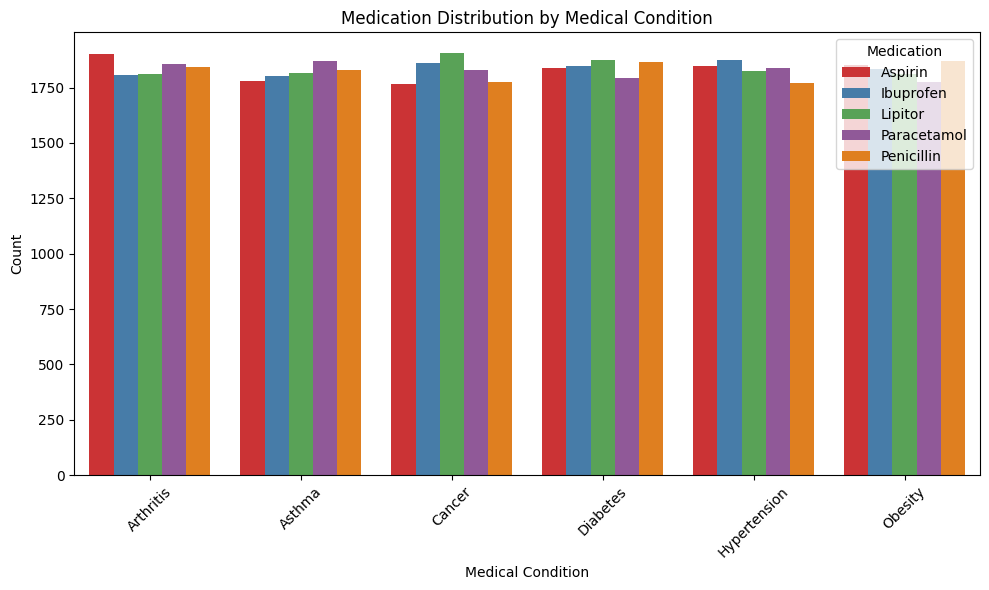

In [123]:
grouped_df = df.groupby(['Medical_Condition', 'Medication']).size().reset_index(name='Count')

pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Medical_Condition', y='Count', hue='Medication', palette='Set1')

plt.title('Medication Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.legend(title='Medication')
plt.tight_layout()
plt.show()

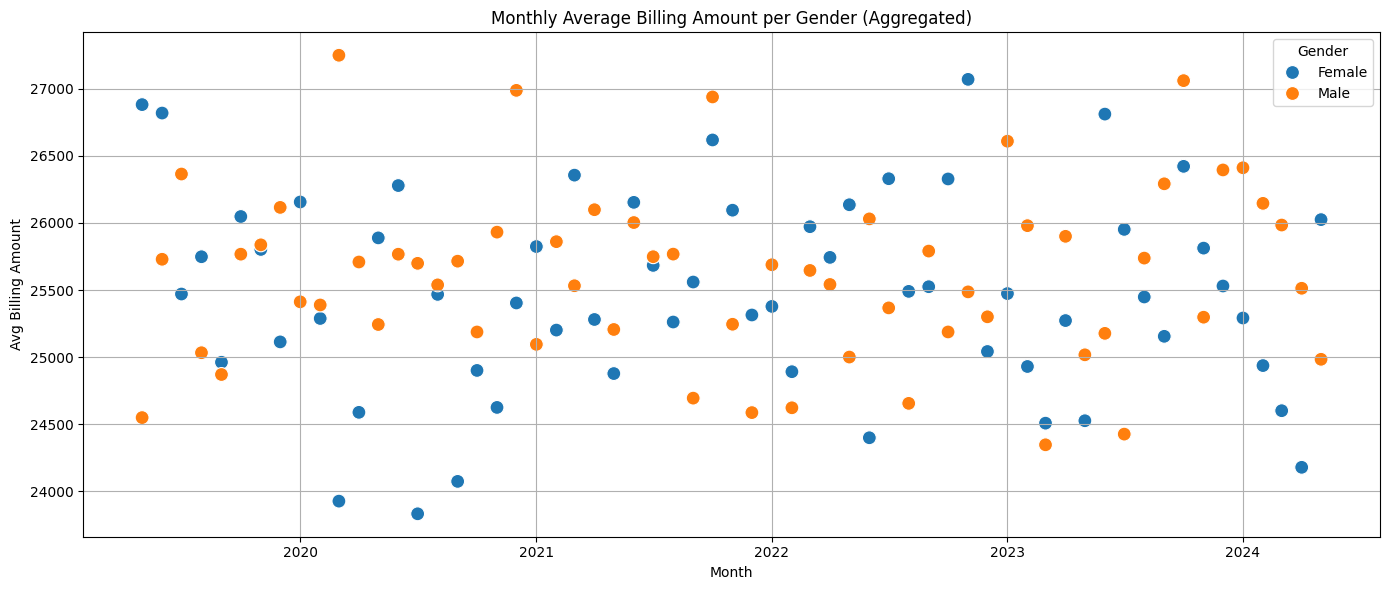

In [133]:
df['Length of Stay'] = (df['Discharge_Date'] - df['Date_of_Admission']).dt.days
monthly_avg = df.groupby(['Month', 'Gender'])['Billing_Amount'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=monthly_avg,
    x='Month',
    y='Billing_Amount',
    hue='Gender',
    style='Gender',
    markers={'Male': 'o', 'Female': 'o'},
    s=100,
    palette='tab10'
)

plt.title('Monthly Average Billing Amount per Gender (Aggregated)')
plt.xlabel('Month')
plt.ylabel('Avg Billing Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotly Dashboards


In [157]:
fig = px.sunburst(df, path = ["Test_Results", "Medication"])
fig.update_traces(textinfo = "label + percent parent")
fig.update_layout(title_text = "Test Results by Medication",
                 titlefont = {'size' : 20, 'family' : 'Serif'},)
fig.show()

In [136]:
px.pie(df, names='Gender', title='Gender Distribution').show()


In [159]:
px.sunburst(df, path=['Medical_Condition', 'Gender', 'Test_Results'],
            title="Sunburst: Condition → Gender → Test").show()

In [137]:
px.scatter(df, x='Age', y='Billing_Amount', size='Stay_Duration',
           color='Gender', hover_data=['Medical_Condition'],
           title='Bubble: Age vs Billing (Size = Stay)').show()


In [138]:
radar_data = df.groupby('Medical_Condition')[['Age', 'Billing_Amount', 'Stay_Duration']].mean().reset_index()
metrics = ['Age', 'Billing_Amount', 'Stay_Duration']
fig_radar = go.Figure()
for i in range(len(radar_data)):
    fig_radar.add_trace(go.Scatterpolar(
        r=radar_data.loc[i, metrics].values,
        theta=metrics,
        fill='toself',
        name=radar_data.loc[i, 'Medical_Condition']
    ))
fig_radar.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="Radar: Avg Metrics per Condition"
)
fig_radar.show()

# Time Series Line Chart


In [161]:
monthly_admissions = df.groupby('Admission_Month').size().reset_index(name='Admissions')
monthly_admissions['Admission_Month'] = monthly_admissions['Admission_Month'].astype(str)
px.line(monthly_admissions, x='Admission_Month', y='Admissions',
        title='Monthly Admissions Over Time', markers=True).show()

In [163]:
px.scatter(df, x='Age', y='Billing_Amount', size='Stay_Duration',
           color='Test_Results', hover_data=['Medical_Condition', 'Gender'],
           title='Bubble: Age vs Billing (Color = Test)').show()

# Forecasting Billing amount


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/v74vc23c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/x0yi213n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69090', 'data', 'file=/tmp/tmpher_lhrj/v74vc23c.json', 'init=/tmp/tmpher_lhrj/x0yi213n.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_modelzoj8d4og/prophet_model-20250407003320.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:33:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:33:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


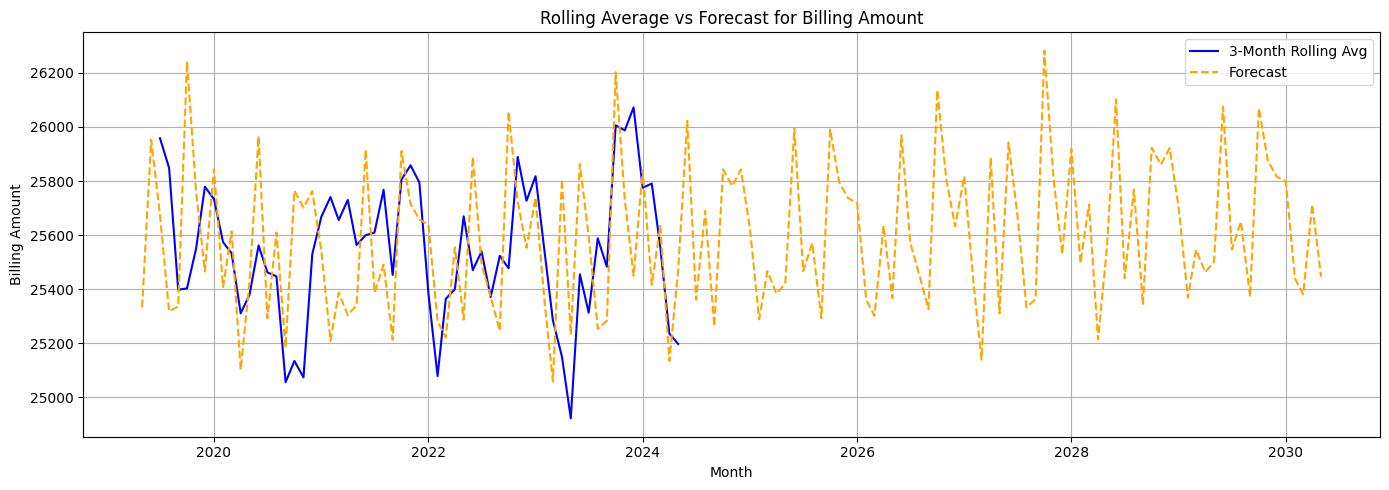

In [129]:
df['Date_of_Admission'] = pd.to_datetime(df['Date_of_Admission'])
df['Month'] = df['Date_of_Admission'].dt.to_period('M').dt.to_timestamp()
billing_df = df[['Month', 'Billing_Amount']].groupby('Month').mean().reset_index()
billing_df.columns = ['ds', 'y']

model = Prophet()
model.fit(billing_df)

future = model.make_future_dataframe(periods=72, freq='MS')
forecast = model.predict(future)

plt.figure(figsize=(14, 5))
rolling = billing_df.set_index('ds')['y'].rolling(window=3).mean()
plt.plot(rolling, label='3-Month Rolling Avg', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], '--', label='Forecast', color='orange')
plt.title("Rolling Average vs Forecast for Billing Amount")
plt.xlabel('Month')
plt.ylabel('Billing Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Forecasting Billing amount in respect to medical condition


In [165]:
df['Date_of_Admission'] = pd.to_datetime(df['Date_of_Admission'])
df['Month'] = df['Date_of_Admission'].dt.to_period('M').dt.to_timestamp()

for condition in df['Medical_Condition'].dropna().unique():
    cond_df = df[df['Medical_Condition'] == condition].copy()
    monthly = cond_df.groupby('Month')['Billing_Amount'].mean().reset_index()
    monthly.columns = ['ds', 'y']

    if len(monthly) < 24:
        continue
    model = Prophet()
    model.fit(monthly)
    future = model.make_future_dataframe(periods=72, freq='MS')
    forecast = model.predict(future)

    fig = plot_plotly(model, forecast)
    fig.update_layout(title=f"Interactive Forecast for {condition}",
                      xaxis_title='Month', yaxis_title='Billing Amount',
                      template='plotly_white')
    fig.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/rr0giopy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/18u5ir2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10840', 'data', 'file=/tmp/tmpher_lhrj/rr0giopy.json', 'init=/tmp/tmpher_lhrj/18u5ir2c.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_modelh5bxjtcx/prophet_model-20250407004714.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/ndxqvkgt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/80_4gpc9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88156', 'data', 'file=/tmp/tmpher_lhrj/ndxqvkgt.json', 'init=/tmp/tmpher_lhrj/80_4gpc9.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_modelbmqwmdtz/prophet_model-20250407004715.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/lvgn5nuh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/vtyox07r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50687', 'data', 'file=/tmp/tmpher_lhrj/lvgn5nuh.json', 'init=/tmp/tmpher_lhrj/vtyox07r.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_model_lven7bq/prophet_model-20250407004715.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/41mnnozl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/tmwxem3k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32710', 'data', 'file=/tmp/tmpher_lhrj/41mnnozl.json', 'init=/tmp/tmpher_lhrj/tmwxem3k.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_model8u_1nbqo/prophet_model-20250407004716.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/fkgyqs4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/kl907599.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60635', 'data', 'file=/tmp/tmpher_lhrj/fkgyqs4g.json', 'init=/tmp/tmpher_lhrj/kl907599.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_model1zcxyxug/prophet_model-20250407004716.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/6uoce_4v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/bzv28nfr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37628', 'data', 'file=/tmp/tmpher_lhrj/6uoce_4v.json', 'init=/tmp/tmpher_lhrj/bzv28nfr.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_modelgowpcywh/prophet_model-20250407004717.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Forecasting Medical conditions future Trends


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/jut_md1t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/dm5578pv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53881', 'data', 'file=/tmp/tmpher_lhrj/jut_md1t.json', 'init=/tmp/tmpher_lhrj/dm5578pv.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_modelexr193ei/prophet_model-20250407003601.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:36:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-145-c3e9f036ad96>:31: Us

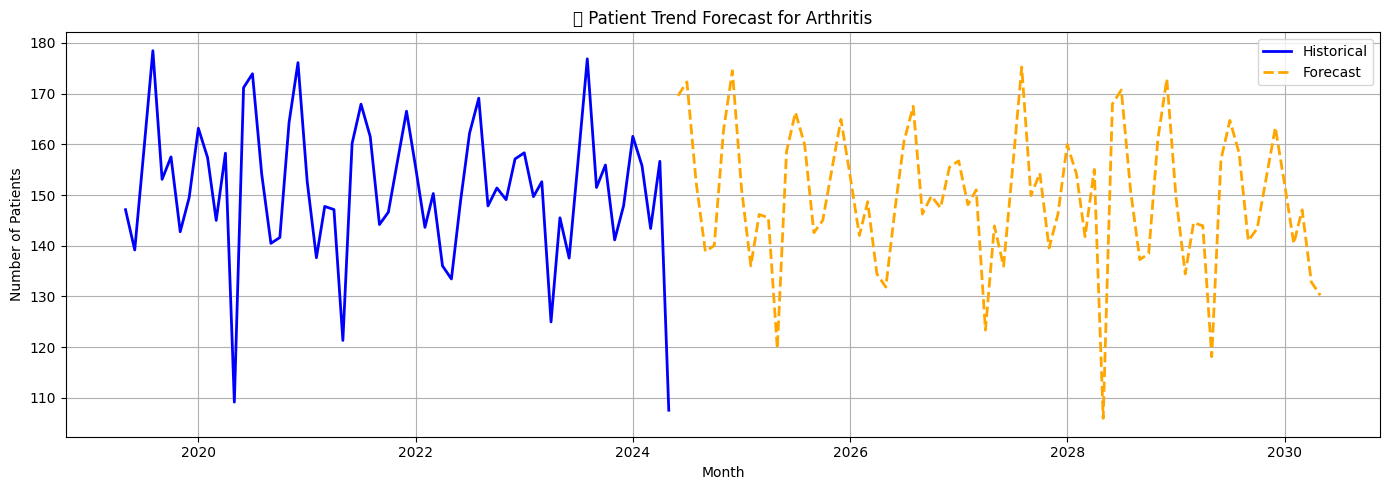

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/podisjj1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/hwsgbvpr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78497', 'data', 'file=/tmp/tmpher_lhrj/podisjj1.json', 'init=/tmp/tmpher_lhrj/hwsgbvpr.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_modeluc2lo01m/prophet_model-20250407003602.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:36:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-145-c3e9f036ad96>:31: Us

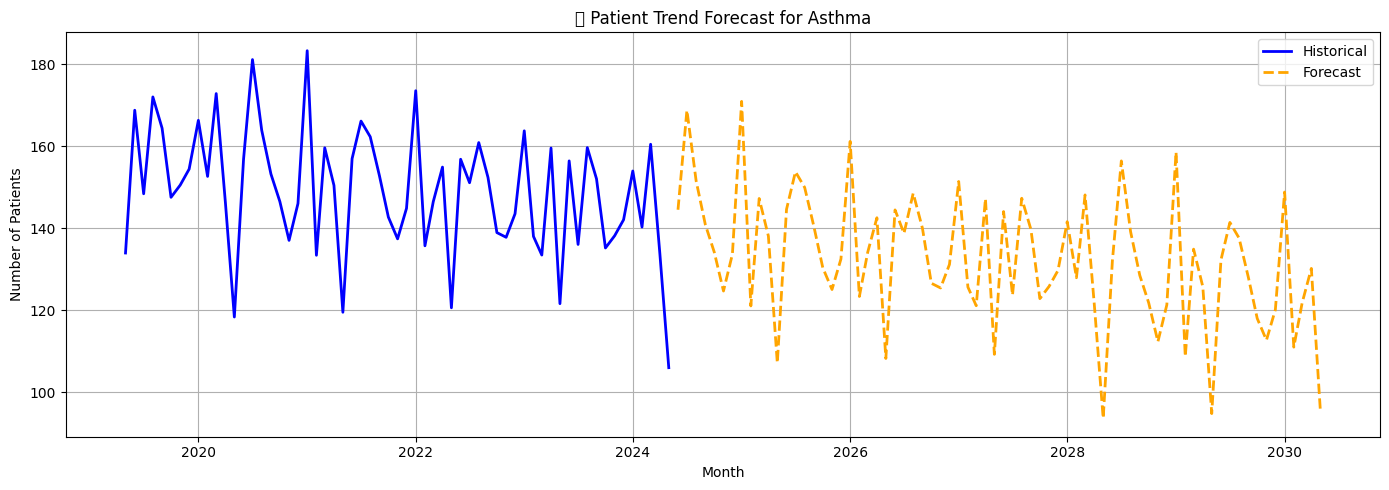

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/bb_smtig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/14g9j371.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37604', 'data', 'file=/tmp/tmpher_lhrj/bb_smtig.json', 'init=/tmp/tmpher_lhrj/14g9j371.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_modelncvsxs6e/prophet_model-20250407003603.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:36:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-145-c3e9f036ad96>:31: Us

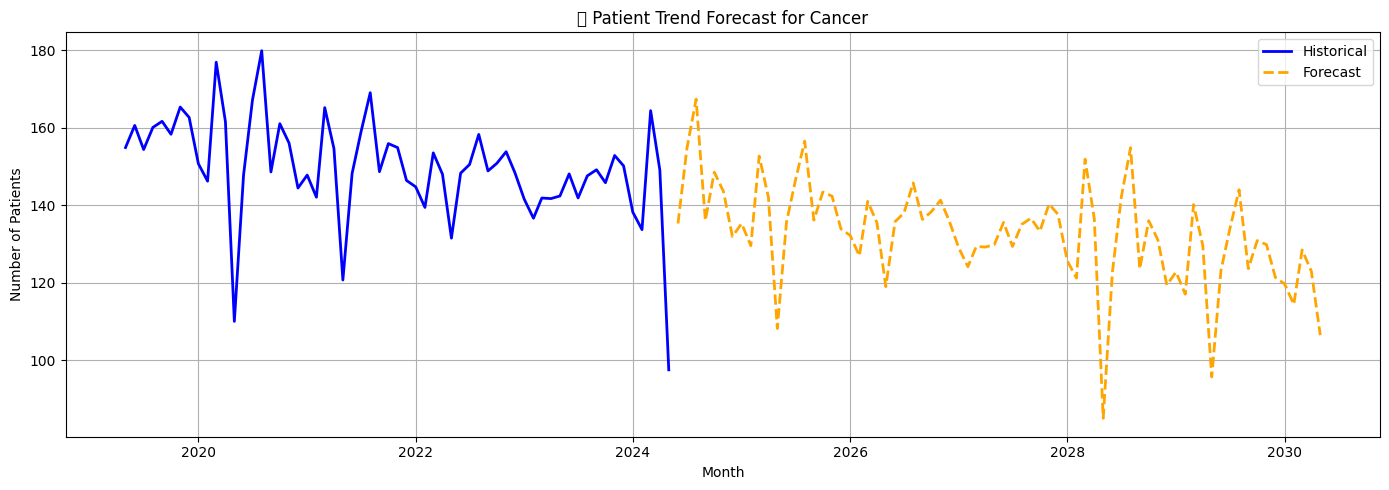

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/80wtuuxa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/vmxjyq2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20469', 'data', 'file=/tmp/tmpher_lhrj/80wtuuxa.json', 'init=/tmp/tmpher_lhrj/vmxjyq2j.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_modells59pwad/prophet_model-20250407003604.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:36:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-145-c3e9f036ad96>:31: Us

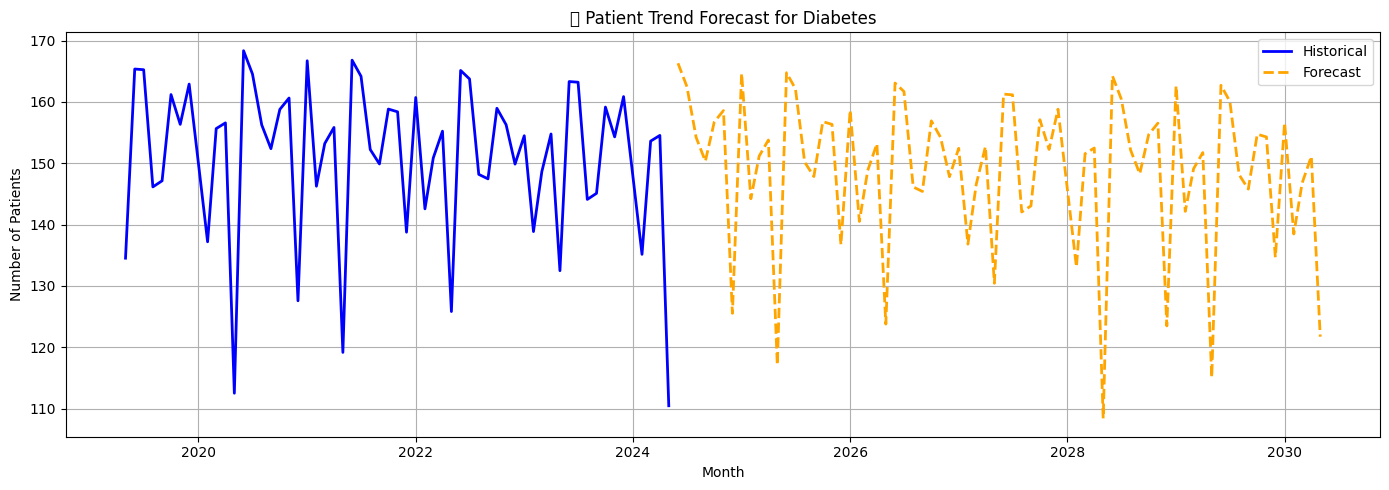

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/xfq00drp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/saw3kabx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51825', 'data', 'file=/tmp/tmpher_lhrj/xfq00drp.json', 'init=/tmp/tmpher_lhrj/saw3kabx.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_modely0m626f4/prophet_model-20250407003604.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:36:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-145-c3e9f036ad96>:31: Us

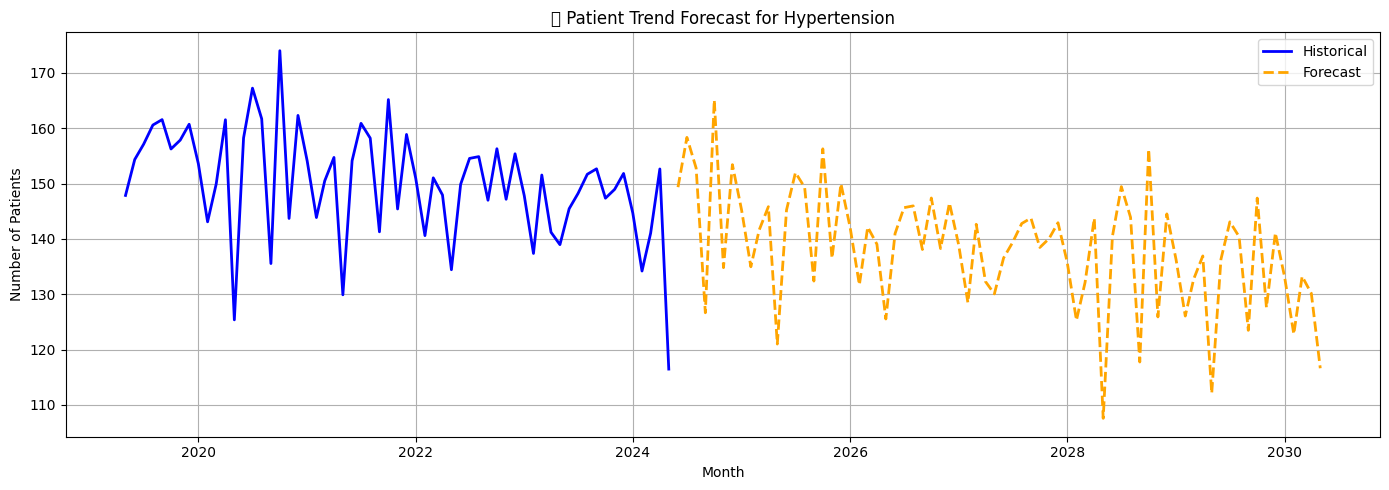

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/8fo08wv0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpher_lhrj/ou7dhe64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64111', 'data', 'file=/tmp/tmpher_lhrj/8fo08wv0.json', 'init=/tmp/tmpher_lhrj/ou7dhe64.json', 'output', 'file=/tmp/tmpher_lhrj/prophet_modeldi0ah_db/prophet_model-20250407003605.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:36:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-145-c3e9f036ad96>:31: Us

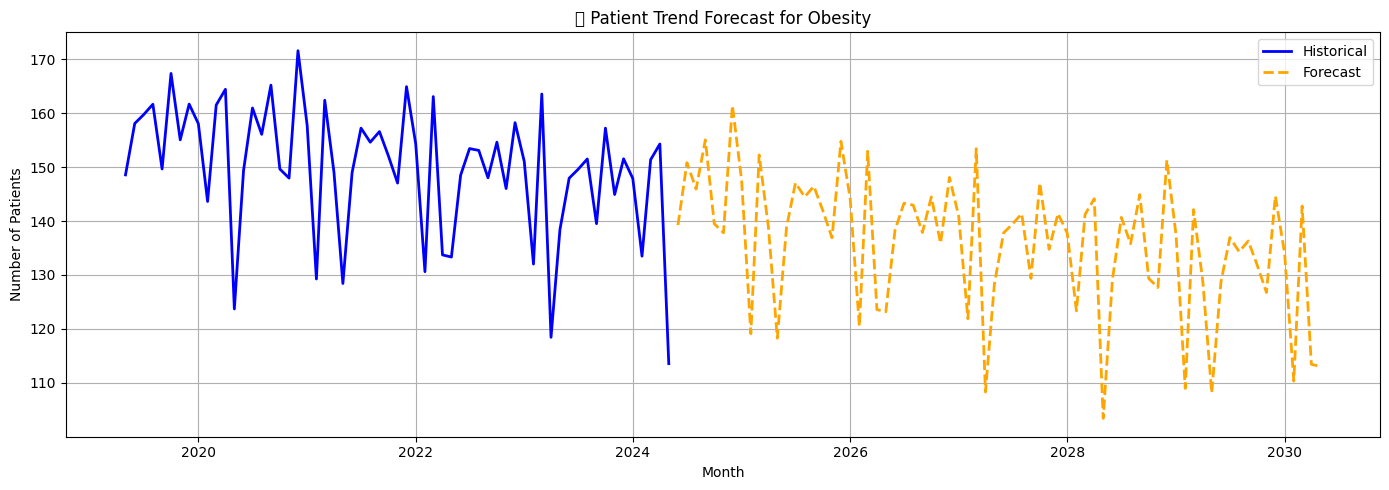

In [145]:
df['Date_of_Admission'] = pd.to_datetime(df['Date_of_Admission'])
df['Month'] = df['Date_of_Admission'].dt.to_period('M').dt.to_timestamp()

condition_counts = df.groupby(['Month', 'Medical_Condition']).size().unstack(fill_value=0)

for condition in condition_counts.columns:
    cond_data = condition_counts[[condition]].reset_index()
    cond_data.columns = ['ds', 'y']

    if cond_data['y'].sum() < 10:
        continue

    model = Prophet()
    model.fit(cond_data)

    future = model.make_future_dataframe(periods=72, freq='MS')
    forecast = model.predict(future)

    hist_end = cond_data['ds'].max()
    historical = forecast[forecast['ds'] <= hist_end]
    future_forecast = forecast[forecast['ds'] > hist_end]

    plt.figure(figsize=(14, 5))
    plt.plot(historical['ds'], historical['yhat'], label='Historical', color='blue', linewidth=2)
    plt.plot(future_forecast['ds'], future_forecast['yhat'], linestyle='--', color='orange', label='Forecast', linewidth=2)
    plt.title(f"📈 Patient Trend Forecast for {condition}")
    plt.xlabel("Month")
    plt.ylabel("Number of Patients")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Most Common Blood Type

In [147]:
most_common_blood_type = df['Blood_Type'].value_counts().idxmax()
print(f"The most common blood type among the patients is {most_common_blood_type}.")


The most common blood type among the patients is A-.


Unique Hospitals

In [68]:
unique_hospitals = df['Hospital'].nunique()
print(f"There are {unique_hospitals} unique hospitals included in the dataset.")


There are 39876 unique hospitals included in the dataset.


Oldest Patient

In [148]:
oldest_patient_age = df['Age'].max()
oldest_patient_name = df[df['Age'] == oldest_patient_age]['Name'].iloc[0]
print(f"The oldest patient in the dataset is {oldest_patient_name} with an age of {oldest_patient_age} years.")

The oldest patient in the dataset is David Newton with an age of 89 years.


The doctor who treated the highest number of patient


In [149]:
doctor_highest_patient_count = df['Doctor'].value_counts().idxmax()
print(f"The doctor who has treated the highest number of patients is {doctor_highest_patient_count}.")

The doctor who has treated the highest number of patients is Michael Smith.


Most common medication

In [150]:
most_frequent_medication = df['Medication'].value_counts().idxmax()
print(f"The most frequently prescribed medication is {most_frequent_medication}.")

The most frequently prescribed medication is Lipitor.


Average Billing amount per patient

In [151]:
average_billing_amount = df['Billing_Amount'].mean()
print(f"The average billing amount for patients is ${average_billing_amount:.2f}.")

The average billing amount for patients is $25544.31.


Insurance Provoder Analysis

In [153]:
provider = df.groupby(by = 'Insurance_Provider').agg(
    {'Billing_Amount': 'sum','Insurance_Provider':'size'})
provider.columns = ['Billing_Amount', 'Patients']
provider['Billing_Amount'] = np.around(provider['Billing_Amount'])
provider = pd.DataFrame(provider.sort_values(by ='Patients')).reset_index()
provider

<ipython-input-153-e635dae6f6c9>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Insurance_Provider  Billing_Amount  Patients
0              Aetna     276498741.0     10822
1         Blue Cross     280409101.0     10952
2   UnitedHealthcare     279915371.0     11014
3           Medicare     282911027.0     11039
4              Cigna     284334099.0     11139